In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('10stocks_price.csv')

In [3]:
df.head()

,date_gsheets,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
0,01/03/2012 16:00,58.75,35.07,10.32,77.68,38.31,186.30,39.73,60.33,18.36,28.08
1,01/04/2012 16:00,59.06,34.85,11.49,76.80,38.85,185.54,39.21,59.71,18.56,27.71
2,01/05/2012 16:00,59.72,34.69,11.33,76.93,39.50,184.66,38.94,59.42,18.55,27.12
3,01/06/2012 16:00,60.34,34.47,12.33,76.39,39.91,182.54,38.33,59.00,18.65,26.91
4,01/09/2012 16:00,60.25,34.47,14.03,76.29,39.75,181.59,38.37,59.18,18.86,27.25


In [4]:
type(df['date_gsheets'][0])

str

In [5]:
df['date_gsheets'] = pd.to_datetime(df['date_gsheets'])

In [6]:
df['date_gsheets'].describe()

C:\Users\mhack\AppData\Local\Temp\ipykernel_5884\3129557638.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date_gsheets'].describe()


count                    1509
unique                   1509
top       2012-01-03 16:00:00
freq                        1
first     2012-01-03 16:00:00
last      2017-12-29 16:00:00
Name: date_gsheets, dtype: object

In [7]:
df.describe()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,102.874380,41.119881,77.348801,130.578032,84.278529,172.739881,47.687641,73.481365,25.564983,185.623453
std,28.856614,2.915722,52.093716,29.738410,23.340639,21.860902,3.686156,7.579578,3.725205,97.668462
min,55.790000,33.490000,7.690000,76.290000,38.310000,117.850000,36.800000,56.420000,17.360000,22.790000
25%,78.440000,38.900000,34.220000,112.700000,64.020000,154.000000,45.560000,69.120000,23.190000,117.820000
50%,99.520000,41.170000,64.360000,134.140000,92.030000,173.480000,48.120000,73.780000,25.790000,207.830000
75%,119.250000,43.000000,110.100000,146.690000,104.030000,191.950000,50.030000,77.490000,28.630000,247.740000
max,176.420000,47.430000,202.680000,199.560000,121.690000,215.800000,56.530000,99.620000,32.930000,385.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_gsheets  1509 non-null   datetime64[ns]
 1   AAPL          1509 non-null   float64       
 2   KO            1509 non-null   float64       
 3   NFLX          1509 non-null   float64       
 4   BRK.B         1509 non-null   float64       
 5   DIS           1509 non-null   float64       
 6   IBM           1509 non-null   float64       
 7   VZ            1509 non-null   float64       
 8   WMT           1509 non-null   float64       
 9   GE            1509 non-null   float64       
 10  TSLA          1509 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 129.8 KB


In [9]:
df.set_index('date_gsheets', inplace=True)

In [10]:
df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
date_gsheets,,,,,,,,,,
2012-01-03 16:00:00,58.75,35.07,10.32,77.68,38.31,186.30,39.73,60.33,18.36,28.08
2012-01-04 16:00:00,59.06,34.85,11.49,76.80,38.85,185.54,39.21,59.71,18.56,27.71
2012-01-05 16:00:00,59.72,34.69,11.33,76.93,39.50,184.66,38.94,59.42,18.55,27.12
2012-01-06 16:00:00,60.34,34.47,12.33,76.39,39.91,182.54,38.33,59.00,18.65,26.91
2012-01-09 16:00:00,60.25,34.47,14.03,76.29,39.75,181.59,38.37,59.18,18.86,27.25


In [11]:
returns_df = df.pct_change(1)

In [12]:
returns_df

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
date_gsheets,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177
2012-01-05 16:00:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292
2012-01-06 16:00:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743
2012-01-09 16:00:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635
...,...,...,...,...,...,...,...,...,...,...
2017-12-22 16:00:00,0.000000,-0.000219,0.006998,-0.004877,-0.008214,0.006601,0.003396,0.001530,0.001717,-0.019478
2017-12-26 16:00:00,-0.025370,0.004826,-0.011477,-0.001768,-0.005061,0.002164,0.000564,0.009673,-0.004000,-0.024323
2017-12-27 16:00:00,0.000176,0.002620,-0.008095,0.005669,-0.004440,0.001963,0.001127,0.001008,-0.002869,-0.017807


In [13]:
num_stocks = 10
weights = [1 / num_stocks] * num_stocks

In [14]:
weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [15]:
vcv_matrix = returns_df.cov()

In [16]:
vcv_matrix

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
AAPL,0.000246,0.000028,0.000059,0.000044,0.000048,0.000048,0.000027,0.000029,0.000047,0.000094
KO,0.000028,0.000075,0.000026,0.000037,0.000037,0.000032,0.000033,0.000029,0.000035,0.000038
NFLX,0.000059,0.000026,0.001063,0.000054,0.000057,0.000046,0.000015,0.000035,0.000060,0.000230
BRK.B,0.000044,0.000037,0.000054,0.000080,0.000055,0.000050,0.000038,0.000032,0.000057,0.000060
DIS,0.000048,0.000037,0.000057,0.000055,0.000132,0.000045,0.000039,0.000034,0.000058,0.000080
IBM,0.000048,0.000032,0.000046,0.000050,0.000045,0.000132,0.000035,0.000028,0.000057,0.000065
VZ,0.000027,0.000033,0.000015,0.000038,0.000039,0.000035,0.000103,0.000032,0.000044,0.000034
WMT,0.000029,0.000029,0.000035,0.000032,0.000034,0.000028,0.000032,0.000115,0.000030,0.000036
GE,0.000047,0.000035,0.000060,0.000057,0.000058,0.000057,0.000044,0.000030,0.000136,0.000066
TSLA,0.000094,0.000038,0.000230,0.000060,0.000080,0.000065,0.000034,0.000036,0.000066,0.000931


In [17]:
var_p = np.dot(np.transpose(weights), np.dot(vcv_matrix, weights))

In [18]:
var_p

7.332673907420128e-05

In [19]:
sd_p = np.sqrt(var_p)

In [20]:
sd_p

0.008563103355338022

In [21]:
sd_p_annual = sd_p * np.sqrt(250)

In [22]:
sd_p_annual

0.13539455221149158

In [23]:
individual_risks = np.std(returns_df) * np.sqrt(250)

In [24]:
individual_risks

AAPL     0.248003
KO       0.137257
NFLX     0.515302
BRK.B    0.141030
DIS      0.181313
IBM      0.181705
VZ       0.160220
WMT      0.169281
GE       0.184478
TSLA     0.482230
dtype: float64

In [25]:
returns_df.head()

,AAPL,KO,NFLX,BRK.B,DIS,IBM,VZ,WMT,GE,TSLA
date_gsheets,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.005277,-0.006273,0.113372,-0.011329,0.014096,-0.004079,-0.013088,-0.010277,0.010893,-0.013177
2012-01-05 16:00:00,0.011175,-0.004591,-0.013925,0.001693,0.016731,-0.004743,-0.006886,-0.004857,-0.000539,-0.021292
2012-01-06 16:00:00,0.010382,-0.006342,0.088261,-0.007019,0.010380,-0.011481,-0.015665,-0.007068,0.005391,-0.007743
2012-01-09 16:00:00,-0.001492,0.000000,0.137875,-0.001309,-0.004009,-0.005204,0.001044,0.003051,0.011260,0.012635


In [26]:
tickers = list(returns_df.columns)

In [27]:
tickers

['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT', 'GE', 'TSLA']

In [28]:
portfolios = []

for i in range(1, len(tickers) + 1):
    portfolios.append(tickers[0:i])

In [29]:
portfolios

[['AAPL'],
 ['AAPL', 'KO'],
 ['AAPL', 'KO', 'NFLX'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT', 'GE'],
 ['AAPL', 'KO', 'NFLX', 'BRK.B', 'DIS', 'IBM', 'VZ', 'WMT', 'GE', 'TSLA']]

In [30]:
# Calculate the risk of each portfolio
portfolio_risks = []

for port in portfolios:
    df = returns_df[port]
    
    num_stocks = len(df.columns)
    weights = [1 / num_stocks] * num_stocks
    vcv_p = df.cov()
    
    var_p = np.dot(np.transpose(weights), np.dot(vcv_p, weights))
    sd_p = np.sqrt(var_p)
    sd_p_annual = sd_p * np.sqrt(250)
    
    portfolio_risks.append(sd_p_annual)

In [31]:
portfolio_risks

[0.24808505375568835,
 0.1536167740652437,
 0.21145655417390294,
 0.17491660730394223,
 0.15759159863421662,
 0.14571266561387228,
 0.13422929292622485,
 0.1262813443034354,
 0.12416648815658816,
 0.13539455221149158]

In [32]:
risks_df = pd.DataFrame(portfolio_risks)

In [33]:
risks_df.rename(columns={risks_df.columns[0] : 'total_risk'}, inplace=True)

In [34]:
risks_df

,total_risk
0,0.248085
1,0.153617
2,0.211457
3,0.174917
4,0.157592
5,0.145713
6,0.134229
7,0.126281
8,0.124166
9,0.135395


<AxesSubplot:>

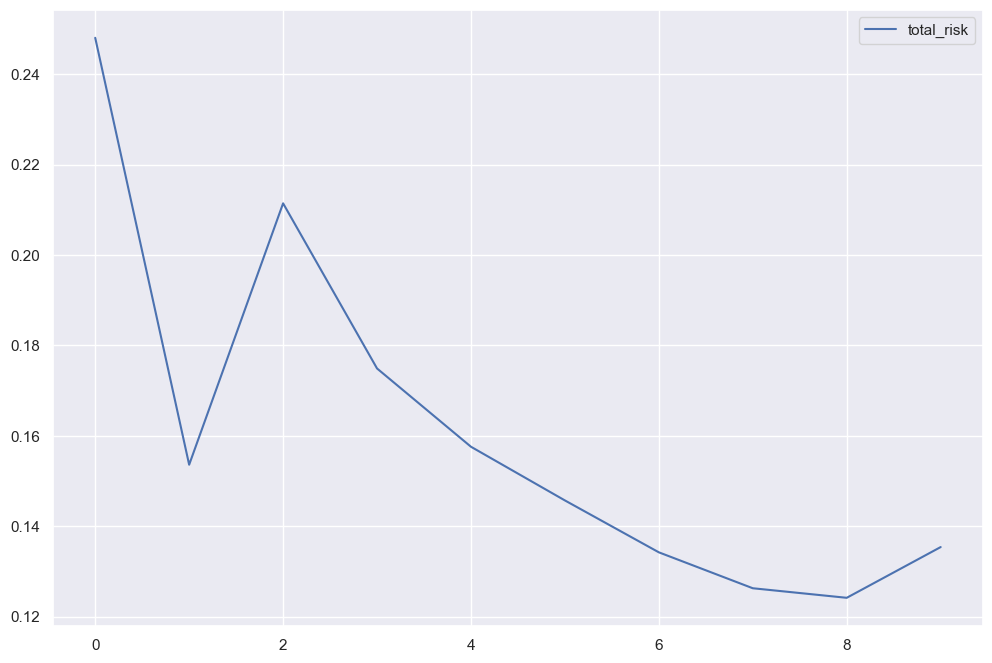

In [35]:
risks_df.plot(figsize=(12,8))

In [36]:
np.std(returns_df) * np.sqrt(250)

AAPL     0.248003
KO       0.137257
NFLX     0.515302
BRK.B    0.141030
DIS      0.181313
IBM      0.181705
VZ       0.160220
WMT      0.169281
GE       0.184478
TSLA     0.482230
dtype: float64